# Faircare Analytics
## EDA

The goal of this notebook is to begin and record Exploratory Data Analysis on the cleaned patient/treatment dataset our team will use to train a model to predict hospital readmissions

#### We read in the clean dataset

We read in the `dataset_clean.csv` file using `pandas`. It is stored in a variable named `faircare`.

In [220]:
import pandas as pd
import numpy as np

In [221]:
#the faircare dataset is imported here. It will be named 'faircare' going forward
faircare = pd.read_csv("/Users/tc884/Desktop/Faircare Project/dataset_clean.csv")

In [222]:
faircare.head()


,Unnamed: 0,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [223]:
faircare.columns
faircare.shape

(97109, 47)

#### 2. Here we check the data types


In [224]:
faircare.dtypes

Unnamed: 0                   int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide               object
glipizide                   object
glyburide           

### Converting "Int Data types to float"

In [225]:


for col in faircare.columns:
    if faircare[col].dtype == 'int64':
        faircare[col] = faircare[col].astype('float64')

#check the data types so we can see whether the conversion worked
faircare.dtypes

Unnamed: 0                  float64
patient_nbr                 float64
race                         object
gender                       object
age                          object
admission_type_id           float64
discharge_disposition_id    float64
admission_source_id         float64
time_in_hospital            float64
num_lab_procedures          float64
num_procedures              float64
num_medications             float64
number_outpatient           float64
number_emergency            float64
number_inpatient            float64
diag_1                       object
diag_2                       object
diag_3                       object
number_diagnoses            float64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                  object
acetohexamide                object
glipizide                   

#### Following our meeting notes, we need to replace the age range with numbers. 
"[0,10)" should become 0, "[10,20)" should become 1, and so on

In [226]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
#it's cool to use LabelEncoder here because our 'age' column actually sorted in ascending 'alphabetical' order
faircare_pd = pd.DataFrame(faircare)
#this is a choice to use LabelEncoder instead of replacing with a dictionary. We'll use a dictionary for replacing other column entries with numbers
faircare_pd['age'] = label_encoder.fit_transform(faircare_pd['age']).astype('float64')




### We can encode the medications following Suradeep's suggestion. 

In [227]:

#faircare_pd.columns()
tests = ['max_glu_serum', 'A1Cresult']
meds =['metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
      'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin',
      'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone','insulin']

mapping = {
    'No': 1.0,
    'Down': 0.0,
    'Steady': 2.0,
    'Up': 3.0
}

target_mapping = {
    'NO': 2.0,
    '>30': 1.0,
    '<30': 0.0
}
faircare_pd[meds] = faircare_pd[meds].replace(mapping)  
faircare_pd['readmitted'].unique()
faircare_pd['readmitted'] = faircare_pd['readmitted'].replace(target_mapping).astype
#we have converted the 'readmitted' column to a binary value, where 1.0 indicates patient was not 
faircare_pd['A1Cresult'].value_counts()
faircare_pd['max_glu_serum'].value_counts()

A1C_mapping = {'Norm': 0.0, '>7': 1.0, '>8': 2.0} 
glucose_mapping = {'Norm': 0.0, '>200': 1.0, '>300': 2.0}
#faircare_pd['A1Cresult']
faircare_pd['A1Cresult'] = faircare_pd['A1Cresult'].astype('str').replace(A1C_mapping).astype('float64')
faircare_pd['max_glu_serum'] = faircare_pd['max_glu_serum'].astype('str').replace(glucose_mapping).astype('float64')




/var/folders/kf/q36kp8917v30nm0v5yw9g4zc9twct_/T/ipykernel_63456/3658755943.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  faircare_pd[meds] = faircare_pd[meds].replace(mapping)
/var/folders/kf/q36kp8917v30nm0v5yw9g4zc9twct_/T/ipykernel_63456/3658755943.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  faircare_pd['readmitted'] = faircare_pd['readmitted'].replace(target_mapping).astype


In [228]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

### Here we calculate the correlation heatmap for the dataset

Text(0.5, 1.0, 'Correlation Heatmap of Faircare Dataset')

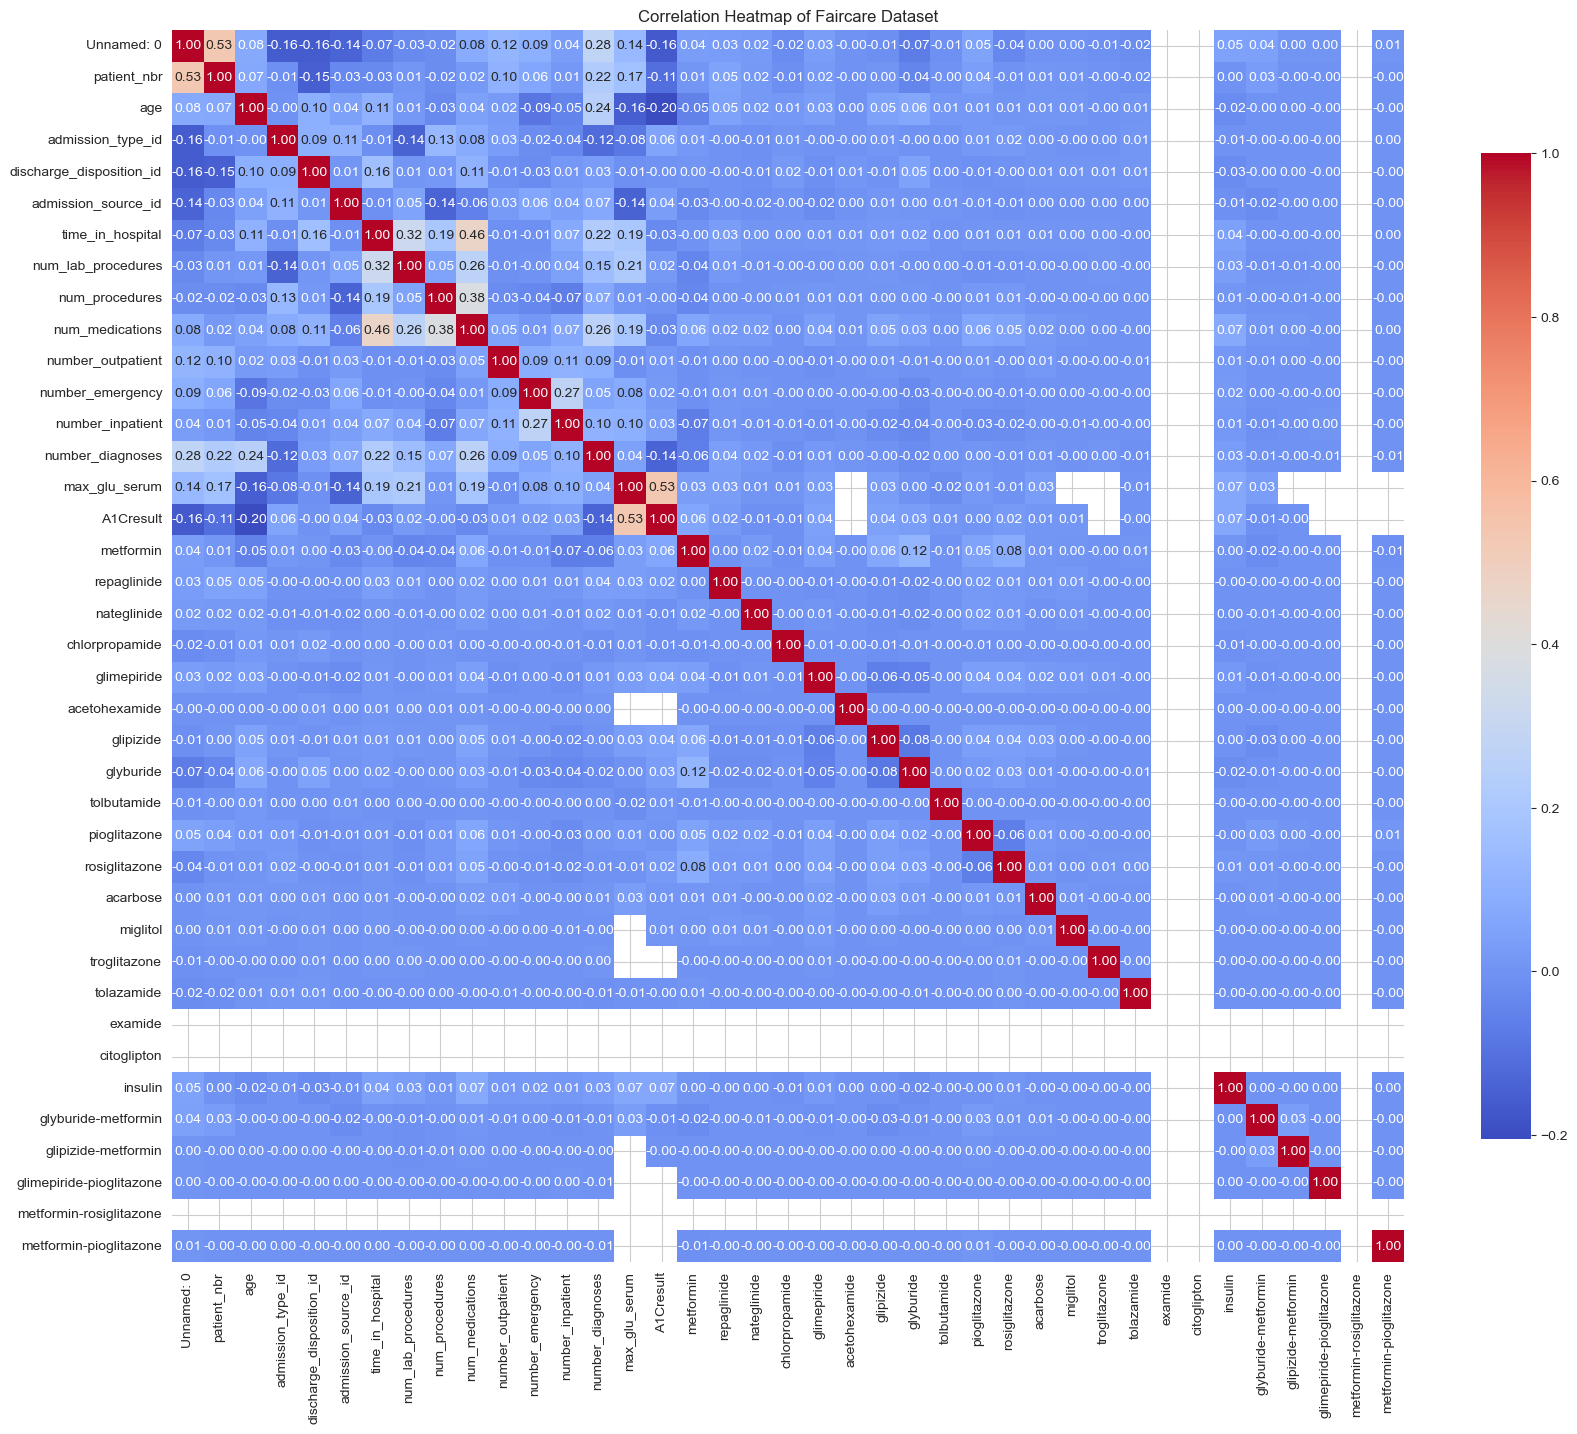

In [229]:
corr = faircare_pd.corr(numeric_only=True)
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Faircare Dataset')


### We now show a breakdown of the patients for the different categories

/var/folders/kf/q36kp8917v30nm0v5yw9g4zc9twct_/T/ipykernel_63456/4044100304.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=faircare_pd, x='age', palette='viridis')


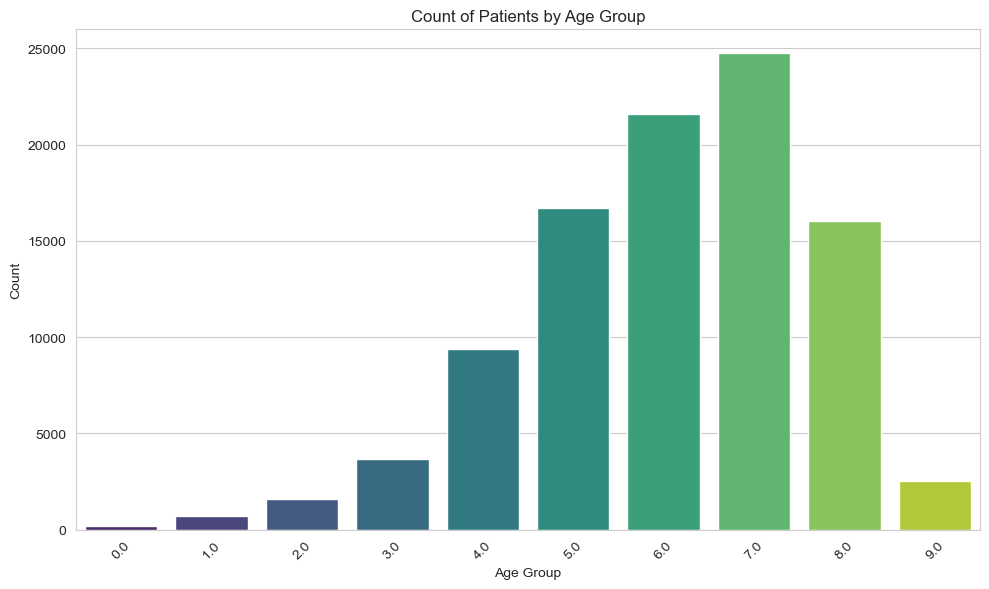

/var/folders/kf/q36kp8917v30nm0v5yw9g4zc9twct_/T/ipykernel_63456/4044100304.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=faircare_pd, x='time_in_hospital', palette='autumn')


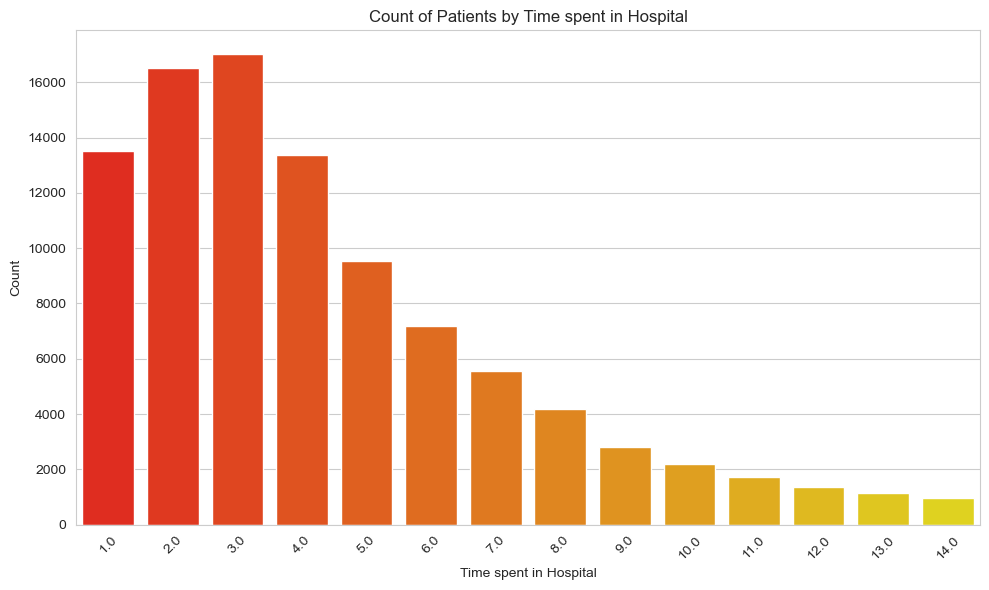

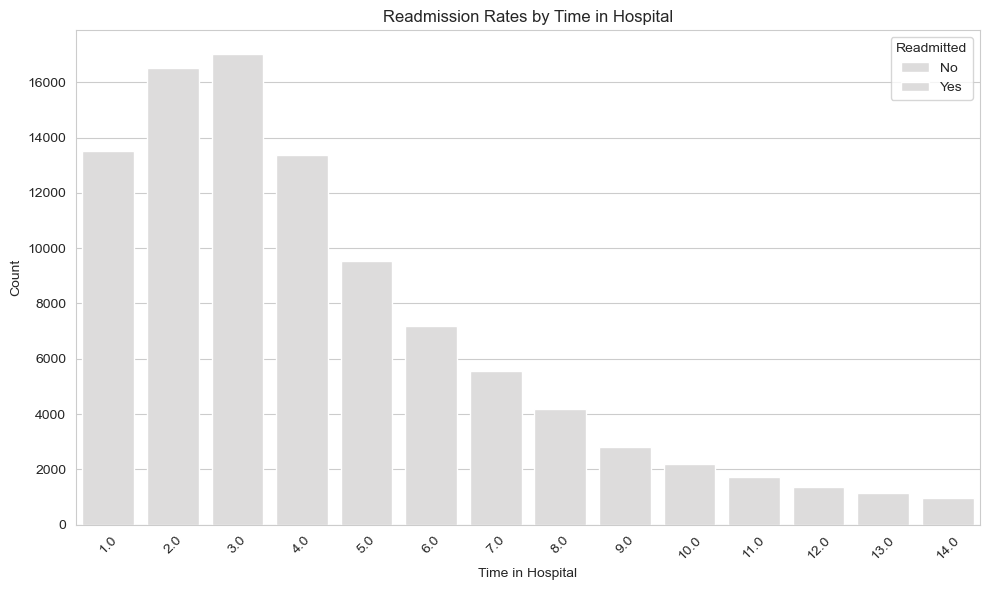

In [ ]:
#show a count of the number of patients in each age group
plt.figure(figsize=(10, 6))
sns.countplot(data=faircare_pd, x='age', palette='viridis')
plt.title('Count of Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
#show a count of the number of patients 
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=faircare_pd, x='time_in_hospital', palette='autumn')
plt.title('Count of Patients by Time spent in Hospital')
plt.xlabel('Time spent in Hospital')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
#show a count of the number of patients 
plt.show()




--------------------------

The Faircare Analytics team. 